In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
dataset = tf.keras.datasets.boston_housing
train, test = dataset.load_data()

In [5]:
x_train = np.array(train[0], np.float32)
y_train = np.array(train[1], np.int32)

x_test = np.array(test[0], np.float32)
y_test = np.array(test[1], np.uint32)

In [6]:
import os, random

def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

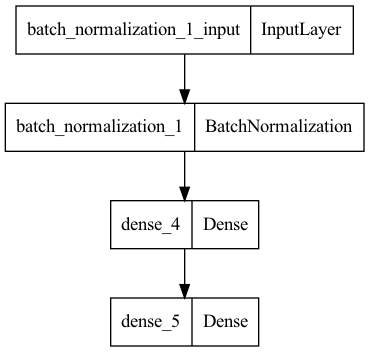

In [13]:
reset_seed(0)
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(13, )),
    tf.keras.layers.Dense(32, activation='relu', input_shape=(13, )),
    tf.keras.layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

tf.keras.utils.plot_model(model)

In [14]:
hist = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(x_test, y_test)
)
score = model.evaluate(x_test, y_test)
score

Epoch 1/30
13/13 [==============================] - 0s 10ms/step - loss: 595.4720 - mae: 22.6361 - val_loss: 844.4781 - val_mae: 27.8502
Epoch 2/30
13/13 [==============================] - 0s 3ms/step - loss: 574.9738 - mae: 22.2463 - val_loss: 745.7338 - val_mae: 25.9560
Epoch 3/30
13/13 [==============================] - 0s 3ms/step - loss: 555.0633 - mae: 21.8582 - val_loss: 686.7041 - val_mae: 24.7760
Epoch 4/30
13/13 [==============================] - 0s 3ms/step - loss: 536.0948 - mae: 21.4764 - val_loss: 643.4832 - val_mae: 23.8928
Epoch 5/30
13/13 [==============================] - 0s 3ms/step - loss: 516.8539 - mae: 21.0685 - val_loss: 608.0161 - val_mae: 23.1589
Epoch 6/30
13/13 [==============================] - 0s 3ms/step - loss: 496.1635 - mae: 20.6665 - val_loss: 576.7185 - val_mae: 22.5036
Epoch 7/30
13/13 [==============================] - 0s 3ms/step - loss: 475.6951 - mae: 20.1960 - val_loss: 546.8111 - val_mae: 21.8673
Epoch 8/30
13/13 [=============================

[82.47123718261719, 7.134161472320557]

<AxesSubplot:>

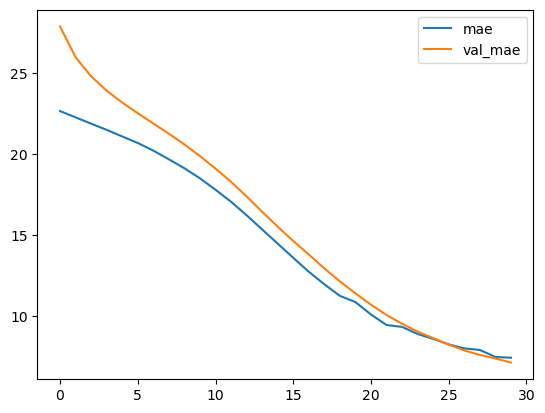

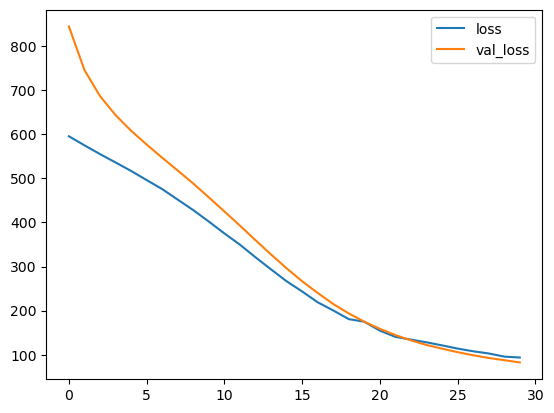

In [23]:
result = pd.DataFrame(hist.history)
result.loc[:, ['mae', 'val_mae']].plot()
result.loc[:, ['loss', 'val_loss']].plot()